In [15]:
# https://www.kaggle.com/datasets/shwetabh123/mall-customers?utm_source=chatgpt.com
# Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, t

# Загружаем данные
data = pd.read_csv('../Lab-3/Mall_Customers.csv')

# Посмотрим на первые строки данных
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


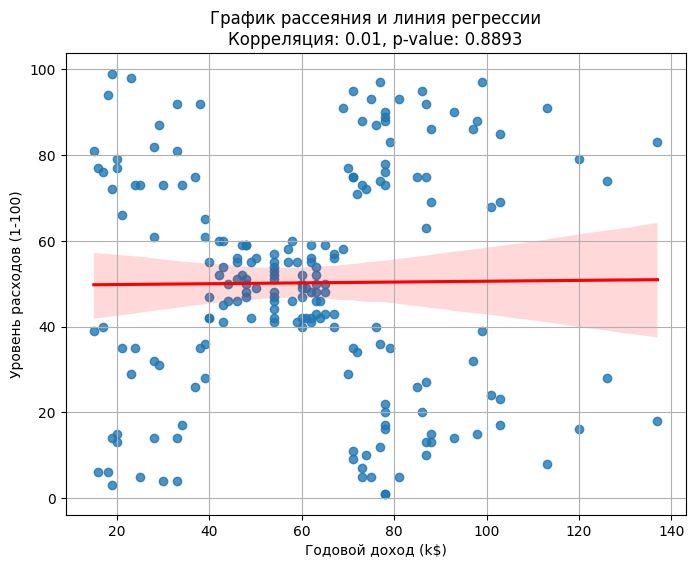

Коэффициент детерминации (R²): 0.0001


In [10]:
# Выбираем переменные для анализа
x = data['Annual Income (k$)']  # Годовой доход
y = data['Spending Score (1-100)']  # Уровень расходов

# Вычисляем коэффициент корреляции Пирсона
correlation, p_value = pearsonr(x, y)

# Строим график рассеяния с линией аппроксимации (регрессии)
plt.figure(figsize=(8, 6))
sns.regplot(x=x, y=y, line_kws={"color": "red"})
plt.title(f'График рассеяния и линия регрессии\nКорреляция: {correlation:.2f}, p-value: {p_value:.4f}')
plt.xlabel('Годовой доход (k$)')
plt.ylabel('Уровень расходов (1-100)')
plt.grid(True)
plt.show()

# Вычисляем коэффициент детерминации (R²)
r_squared = correlation**2
print(f'Коэффициент детерминации (R²): {r_squared:.4f}')


In [11]:
# Случайная выборка (~1/3 от общего объема данных)
random_sample = data.sample(frac=1/3, random_state=42)

# Стратифицированная выборка (по полу 'Genre')
stratified_sample = data.groupby('Genre', group_keys=False).apply(
    lambda x: x.sample(frac=1/3, random_state=42)
)

# Проверяем размеры выборок
print(f'Размер случайной выборки: {len(random_sample)}')
print(f'Размер стратифицированной выборки: {len(stratified_sample)}')


Размер случайной выборки: 67
Размер стратифицированной выборки: 66


C:\Users\Arufureddo\AppData\Local\Temp\ipykernel_1524\2676458441.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = data.groupby('Genre', group_keys=False).apply(


In [19]:
# Функция для расчета доверительных интервалов
def confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    sem = np.std(data, ddof=1) / np.sqrt(len(data))  # Стандартная ошибка среднего
    margin = sem * t.ppf((1 + confidence) / 2, df=len(data) - 1)
    return mean, mean - margin, mean + margin

# Среднее и доверительные интервалы для случайной выборки
mean_random, lower_random_90, upper_random_90 = confidence_interval(
    random_sample['Spending Score (1-100)'], confidence=0.90
)
_, lower_random_95, upper_random_95 = confidence_interval(
    random_sample['Spending Score (1-100)'], confidence=0.95
)
_, lower_random_99, upper_random_99 = confidence_interval(
    random_sample['Spending Score (1-100)'], confidence=0.99
)

# Среднее и доверительные интервалы для стратифицированной выборки
mean_stratified, lower_stratified_90, upper_stratified_90 = confidence_interval(
    stratified_sample['Spending Score (1-100)'], confidence=0.90
)
_, lower_stratified_95, upper_stratified_95 = confidence_interval(
    stratified_sample['Spending Score (1-100)'], confidence=0.95
)
_, lower_stratified_99, upper_stratified_99 = confidence_interval(
    stratified_sample['Spending Score (1-100)'], confidence=0.99
)

# Среднее для всей генеральной совокупности
mean_population = np.mean(data['Spending Score (1-100)'])

# Вывод результатов
print("Случайная выборка:")
print(f"Среднее значение: {mean_random:.2f}")
print(f"90% доверительный интервал: ({lower_random_90:.2f}, {upper_random_90:.2f})")
print(f"95% доверительный интервал: ({lower_random_95:.2f}, {upper_random_95:.2f})")
print(f"99% доверительный интервал: ({lower_random_99:.2f}, {upper_random_99:.2f})\n")

print("Стратифицированная выборка:")
print(f"Среднее значение: {mean_stratified:.2f}")
print(f"90% доверительный интервал: ({lower_stratified_90:.2f}, {upper_stratified_90:.2f})")
print(f"95% доверительный интервал: ({lower_stratified_95:.2f}, {upper_stratified_95:.2f})")
print(f"99% доверительный интервал: ({lower_stratified_99:.2f}, {upper_stratified_99:.2f})")


Случайная выборка:
Среднее значение: 48.12
90% доверительный интервал: (43.16, 53.08)
95% доверительный интервал: (42.18, 54.06)
99% доверительный интервал: (40.23, 56.01)

Стратифицированная выборка:
Среднее значение: 43.92
90% доверительный интервал: (38.63, 49.22)
95% доверительный интервал: (37.59, 50.26)
99% доверительный интервал: (35.50, 52.35)


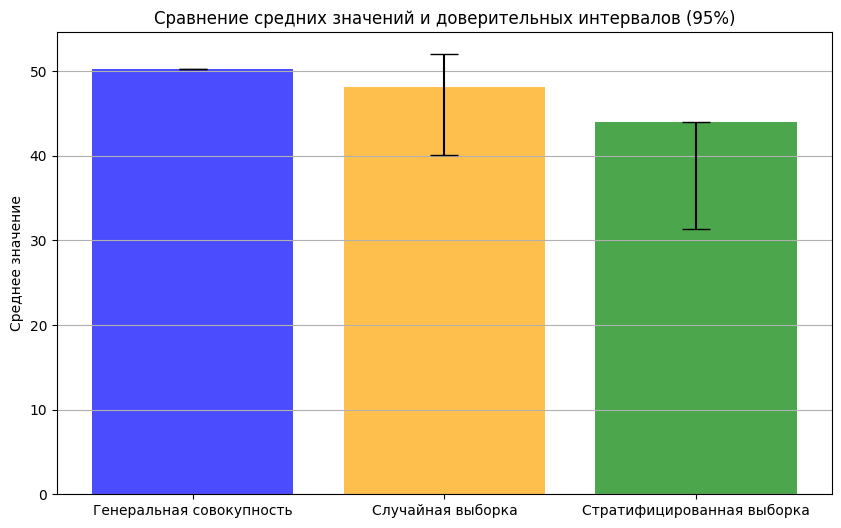

In [ ]:
# Визуализация доверительных интервалов для 95% уровня доверия
labels = ['Генеральная совокупность', 'Случайная выборка', 'Стратифицированная выборка']
means = [mean_population, mean_random, mean_stratified]
lower_bounds = [mean_population, lower_random_95, lower_stratified_95]
upper_bounds = [mean_population, upper_random_95, upper_stratified_95]

# Построение графика с доверительными интервалами
plt.figure(figsize=(10, 6))
plt.bar(labels, means, yerr=[
    [mean_population - lb for lb in lower_bounds], 
    [ub - mean_population for ub in upper_bounds]
], capsize=10, color=['blue', 'orange', 'gre    en'], alpha=0.7)
plt.title('Сравнение средних значений и доверительных интервалов (95%)')
plt.ylabel('Среднее значение')
plt.grid(axis='y')
plt.show()
